In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 확인
# csv파일을 dataframe으로 변환
happiness_df = pd.read_csv('./datasets/happiness_report_2023.csv')
display(happiness_df)
print(happiness_df.info())
# display(happiness_df.head())
# print(happiness_df.columns)

# 가장 살기 좋은 대륙


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB
None


In [68]:
# 2. 4분위수 확인
display(happiness_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.539796,1.139929,1.859,4.7240,5.6840,6.3340,7.804
gdp_per_capita,137.0,1.406985,0.432963,0.000,1.0990,1.4490,1.7980,2.200
social_support,137.0,1.156212,0.326322,0.000,0.9620,1.2270,1.4010,1.620
healthy_life_expectancy,136.0,0.366176,0.156691,0.000,0.2485,0.3895,0.4875,0.702
freedom_to_make_life_choices,137.0,0.540000,0.149501,0.000,0.4550,0.5570,0.6560,0.772
generosity,137.0,0.148474,0.076053,0.000,0.0970,0.1370,0.1990,0.422
perceptions_of_corruption,137.0,0.145898,0.126723,0.000,0.0600,0.1110,0.1870,0.561


In [51]:
import numpy as np
from scipy.stats import iqr

hn_Q1 = happiness_df.describe().T.loc['healthy_life_expectancy', '25%']
hn_Q3 = happiness_df.describe().T.loc['healthy_life_expectancy', '75%']
print(hn_Q1, hn_Q3)

# iqr
# iqr_value = iqr(happiness_df.healthy_life_expectancy)
iqr_value = hn_Q3 - hn_Q1
print(iqr_value)

lower_bound = hn_Q1 - 1.5 * iqr_value
upper_bound = hn_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

happiness_df[~(happiness_df['healthy_life_expectancy'] < lower_bound) | (happiness_df['healthy_life_expectancy'] > upper_bound)]
# print(happiness_df.count())

0.2485 0.4875
0.239
정상치 범위: -0.10999999999999999 ~ 0.846


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [52]:
hn_Q1 = happiness_df.describe().T.loc['happiness_score', '25%']
hn_Q3 = happiness_df.describe().T.loc['happiness_score', '75%']
print(hn_Q1, hn_Q3)

# iqr
# iqr_value = iqr(happiness_df.healthy_life_expectancy)
iqr_value = hn_Q3 - hn_Q1
print(iqr_value)

lower_bound = hn_Q1 - 1.5 * iqr_value
upper_bound = hn_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

happiness_df = happiness_df[~(happiness_df['happiness_score'] < lower_bound) | (happiness_df['happiness_score'] > upper_bound)]
# print(happiness_df)

4.724 6.334
1.6099999999999994
정상치 범위: 2.309000000000001 ~ 8.748999999999999


In [53]:
hn_Q1 = happiness_df.describe().T.loc['gdp_per_capita', '25%']
hn_Q3 = happiness_df.describe().T.loc['gdp_per_capita', '75%']
print(hn_Q1, hn_Q3)

# iqr
# iqr_value = iqr(happiness_df.healthy_life_expectancy)
iqr_value = hn_Q3 - hn_Q1
print(iqr_value)

lower_bound = hn_Q1 - 1.5 * iqr_value
upper_bound = hn_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')
print(happiness_df[(happiness_df['gdp_per_capita'] < lower_bound) | (happiness_df['gdp_per_capita'] > upper_bound)].count())
happiness_df = happiness_df[~(happiness_df['gdp_per_capita'] < lower_bound) | (happiness_df['gdp_per_capita'] > upper_bound)]
# print(happiness_df)

1.1005 1.798
0.6975
정상치 범위: 0.05424999999999991 ~ 2.84425
country                         1
region                          1
happiness_score                 1
gdp_per_capita                  1
social_support                  1
healthy_life_expectancy         1
freedom_to_make_life_choices    1
generosity                      1
perceptions_of_corruption       1
dtype: int64


In [54]:
hn_Q1 = happiness_df.describe().T.loc['social_support', '25%']
hn_Q3 = happiness_df.describe().T.loc['social_support', '75%']
print(hn_Q1, hn_Q3)

# iqr
# iqr_value = iqr(happiness_df.healthy_life_expectancy)
iqr_value = hn_Q3 - hn_Q1
print(iqr_value)

lower_bound = hn_Q1 - 1.5 * iqr_value
upper_bound = hn_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

print(happiness_df[(happiness_df['social_support'] < lower_bound) | (happiness_df['social_support'] > upper_bound)].count())
happiness_df = happiness_df[~(happiness_df['social_support'] < lower_bound) | (happiness_df['social_support'] > upper_bound)]
# print(happiness_df)

0.967 1.4015
0.4345
정상치 범위: 0.3152499999999999 ~ 2.0532500000000002
country                         1
region                          1
happiness_score                 1
gdp_per_capita                  1
social_support                  1
healthy_life_expectancy         1
freedom_to_make_life_choices    1
generosity                      1
perceptions_of_corruption       1
dtype: int64


In [55]:
hn_Q1 = happiness_df.describe().T.loc['freedom_to_make_life_choices', '25%']
hn_Q3 = happiness_df.describe().T.loc['freedom_to_make_life_choices', '75%']
print(hn_Q1, hn_Q3)

# iqr
# iqr_value = iqr(happiness_df.healthy_life_expectancy)
iqr_value = hn_Q3 - hn_Q1
print(iqr_value)

lower_bound = hn_Q1 - 1.5 * iqr_value
upper_bound = hn_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

print(happiness_df[(happiness_df['freedom_to_make_life_choices'] < lower_bound) | (happiness_df['freedom_to_make_life_choices'] > upper_bound)].count())
happiness_df = happiness_df[~(happiness_df['freedom_to_make_life_choices'] < lower_bound) | (happiness_df['freedom_to_make_life_choices'] > upper_bound)]
# print(happiness_df)

0.461 0.65825
0.19724999999999998
정상치 범위: 0.16512500000000002 ~ 0.954125
country                         3
region                          3
happiness_score                 3
gdp_per_capita                  3
social_support                  3
healthy_life_expectancy         3
freedom_to_make_life_choices    3
generosity                      3
perceptions_of_corruption       3
dtype: int64


In [56]:
hn_Q1 = happiness_df.describe().T.loc['generosity', '25%']
hn_Q3 = happiness_df.describe().T.loc['generosity', '75%']
print(hn_Q1, hn_Q3)

# iqr
# iqr_value = iqr(happiness_df.healthy_life_expectancy)
iqr_value = hn_Q3 - hn_Q1
print(iqr_value)

lower_bound = hn_Q1 - 1.5 * iqr_value
upper_bound = hn_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

print(happiness_df[(happiness_df['generosity'] < lower_bound) | (happiness_df['generosity'] > upper_bound)].count())
happiness_df = happiness_df[~(happiness_df['generosity'] < lower_bound) | (happiness_df['generosity'] > upper_bound)]
# print(happiness_df)

0.1 0.1995
0.0995
정상치 범위: -0.04924999999999999 ~ 0.34875
country                         2
region                          2
happiness_score                 2
gdp_per_capita                  2
social_support                  2
healthy_life_expectancy         2
freedom_to_make_life_choices    2
generosity                      2
perceptions_of_corruption       2
dtype: int64


In [57]:
hn_Q1 = happiness_df.describe().T.loc['perceptions_of_corruption', '25%']
hn_Q3 = happiness_df.describe().T.loc['perceptions_of_corruption', '75%']
print(hn_Q1, hn_Q3)

# iqr
# iqr_value = iqr(happiness_df.healthy_life_expectancy)
iqr_value = hn_Q3 - hn_Q1
print(iqr_value)

lower_bound = hn_Q1 - 1.5 * iqr_value
upper_bound = hn_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

print(happiness_df[(happiness_df['perceptions_of_corruption'] < lower_bound) | (happiness_df['perceptions_of_corruption'] > upper_bound)].count())
happiness_df = happiness_df[~(happiness_df['perceptions_of_corruption'] < lower_bound) | (happiness_df['perceptions_of_corruption'] > upper_bound)]
# print(happiness_df)

0.06 0.1895
0.1295
정상치 범위: -0.13425 ~ 0.38375000000000004
country                         11
region                          11
happiness_score                 11
gdp_per_capita                  11
social_support                  11
healthy_life_expectancy         11
freedom_to_make_life_choices    11
generosity                      11
perceptions_of_corruption       11
dtype: int64


### 정상치
- healthy_life_expectancy : -0.109 ~ 0.846
- happiness_score : 2.684 ~ 8.608
- gdp_per_capita : 0.075 ~ 2.839
- social_support : 0.330 ~ 2.063
- freedom_to_make_life_choices : 0.174 ~ 0.950
- generosity : -0.049 ~ 0.348
- perceptions_of_corruption : -0.134 ~ 0.383

In [58]:
happiness_df.reset_index(drop=True, inplace=True)
happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
126,Malawi,Sub-Saharan Africa,3.495,0.637,0.479,0.189,0.490,0.139,0.129
127,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
128,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
129,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117


In [59]:
# 3. 결측치 검사

# happiness_df.count()
happiness_df.isna().sum()
# healthy_life_expectancy에 하나의 결측치가 있다.



country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [60]:
# 4. 평균, 중앙, 최빈
print(happiness_df.describe().T.loc['happiness_score', 'mean'])

print(happiness_df.describe().T.loc['happiness_score', '50%'])

# print(happiness_df.describe().T.loc['happiness_score'])
# print(happiness_df.mode())
# happiness_df['region'].mode()

5.625625954198473
5.738


In [61]:
# 5. 결측치 대체
# 결측치가 하나밖에 없어서 큰 영향이 없을 것 같아 날려버렸다.
happiness_df = happiness_df[~ happiness_df['healthy_life_expectancy'].isna()]
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [62]:
# 평균값
hp_mean_df = happiness_df.groupby('region').mean('healthy_life_expectancy').reset_index()
display(hp_mean_df)

hp_mean_df2 = happiness_df.groupby('region').mean('happiness_score').reset_index()
display(hp_mean_df2)

# 최소값
hp_min_df = happiness_df.groupby('region').min('healthy_life_expectancy').reset_index()
display(hp_min_df)

# 최대값
hp_max_df = happiness_df.groupby('region').max('healthy_life_expectancy').reset_index()
display(hp_max_df)

# 표준편차
hp_std_df = happiness_df.groupby('region')['healthy_life_expectancy'].std().reset_index()
display(hp_std_df)

,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
1,Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
2,East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
3,Latin America and Caribbean,6.008000,1.424611,1.260167,0.416111,0.619056,0.103833,0.105778
4,Middle East and North Africa,5.410545,1.539000,1.109455,0.398636,0.491909,0.106273,0.141545
5,North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250
6,South Asia,4.535000,1.154800,0.819000,0.294400,0.583800,0.158000,0.113600
7,Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
8,Sub-Saharan Africa,4.409774,0.912452,0.846871,0.147452,0.436742,0.167516,0.096484
9,Western Europe,6.894350,1.911050,1.434950,0.547800,0.627500,0.156750,0.301550


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.967091,1.618364,1.361545,0.430545,0.566227,0.137273,0.076227
1,Commonwealth of Independent States,5.828250,1.231000,1.381250,0.368000,0.675500,0.183500,0.166750
2,East Asia,5.930167,1.734667,1.316667,0.521833,0.510333,0.110833,0.190167
3,Latin America and Caribbean,6.008000,1.424611,1.260167,0.416111,0.619056,0.103833,0.105778
4,Middle East and North Africa,5.410545,1.539000,1.109455,0.398636,0.491909,0.106273,0.141545
5,North America and ANZ,7.018250,1.900500,1.496250,0.494000,0.640500,0.225000,0.329250
6,South Asia,4.535000,1.154800,0.819000,0.294400,0.583800,0.158000,0.113600
7,Southeast Asia,5.431222,1.400889,1.149333,0.360333,0.667111,0.233778,0.156000
8,Sub-Saharan Africa,4.409774,0.912452,0.846871,0.147452,0.436742,0.167516,0.096484
9,Western Europe,6.894350,1.911050,1.434950,0.547800,0.627500,0.156750,0.301550


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,5.071,1.358,0.947,0.355,0.449,0.000,0.000
1,Commonwealth of Independent States,5.330,0.972,1.248,0.291,0.599,0.104,0.018
2,East Asia,5.308,1.379,1.188,0.244,0.407,0.009,0.058
3,Latin America and Caribbean,5.526,1.109,1.044,0.310,0.546,0.065,0.027
4,Middle East and North Africa,4.120,1.236,0.535,0.324,0.252,0.013,0.016
5,North America and ANZ,6.894,1.842,1.460,0.390,0.557,0.210,0.172
6,South Asia,4.036,0.979,0.513,0.158,0.511,0.120,0.086
7,Southeast Asia,4.372,1.025,0.853,0.257,0.460,0.104,0.013
8,Sub-Saharan Africa,3.138,0.531,0.479,0.000,0.187,0.021,0.013
9,Western Europe,5.931,1.708,1.224,0.511,0.248,0.008,0.037


,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Central and Eastern Europe,6.845,1.823,1.544,0.532,0.728,0.275,0.372
1,Commonwealth of Independent States,6.144,1.664,1.491,0.417,0.740,0.260,0.292
2,East Asia,6.535,1.951,1.494,0.702,0.666,0.239,0.390
3,Latin America and Caribbean,6.609,1.714,1.445,0.511,0.713,0.189,0.254
4,Middle East and North Africa,7.473,2.015,1.521,0.577,0.748,0.229,0.250
5,North America and ANZ,7.123,1.980,1.544,0.541,0.677,0.242,0.471
6,South Asia,5.360,1.422,1.224,0.426,0.685,0.215,0.165
7,Southeast Asia,6.587,2.168,1.354,0.607,0.768,0.422,0.561
8,Sub-Saharan Africa,5.902,1.589,1.428,0.336,0.625,0.332,0.269
9,Western Europe,7.804,2.200,1.620,0.582,0.772,0.272,0.535


,region,healthy_life_expectancy
0,Central and Eastern Europe,0.047469
1,Commonwealth of Independent States,0.054222
2,East Asia,0.161283
3,Latin America and Caribbean,0.063627
4,Middle East and North Africa,0.071542
5,North America and ANZ,0.070309
6,South Asia,0.101948
7,Southeast Asia,0.114393
8,Sub-Saharan Africa,0.068978
9,Western Europe,0.017784


### feature별 최상위
- healthy_life_expectancy : 서유럽(Western Europe) 0.547
- happiness_score : 북아메리카와 오스트레일리아, 뉴질랜드 (ANZ는 "Australia and New Zealand"의 약어)(North America and ANZ) 7.018
- gdp_per_capita : 서유럽(Western Europe) 1.911
- social_support : 북아메리카와 오스트레일리아, 뉴질랜드(North America and ANZ) 1.496
- freedom_to_make_life_choices : 러시아, 우크라이나, 벨라루스, 카자흐스탄 등 구 소련(Commonwealth of Independent States) 0.675
- generosity : 동남아(Southeast Asia) 0.233
- perceptions_of_corruption : 북아메리카와 오스트레일리아, 뉴질랜드(North America and ANZ) 0.329
-
- healthy_life_expectancy : 아프리카 사하라사막 이남지역(Sub-Saharan Africa)- 
happiness_score : 남부아시아(South Asia)- 
gdp_per_capita : 아프리카 사하라사막 이남지역(Sub-Saharan Africa- )
social_support : 남부아시아(South Asi- a)
freedom_to_make_life_choices : 아프리카 사하라사막 이남지역(Sub-Saharan Afri- ca)
generosity : 중동 북아프리카(Middle East and North Afr- ica)
perceptions_of_corruption : 동유럽(Central and Easterne)urope)

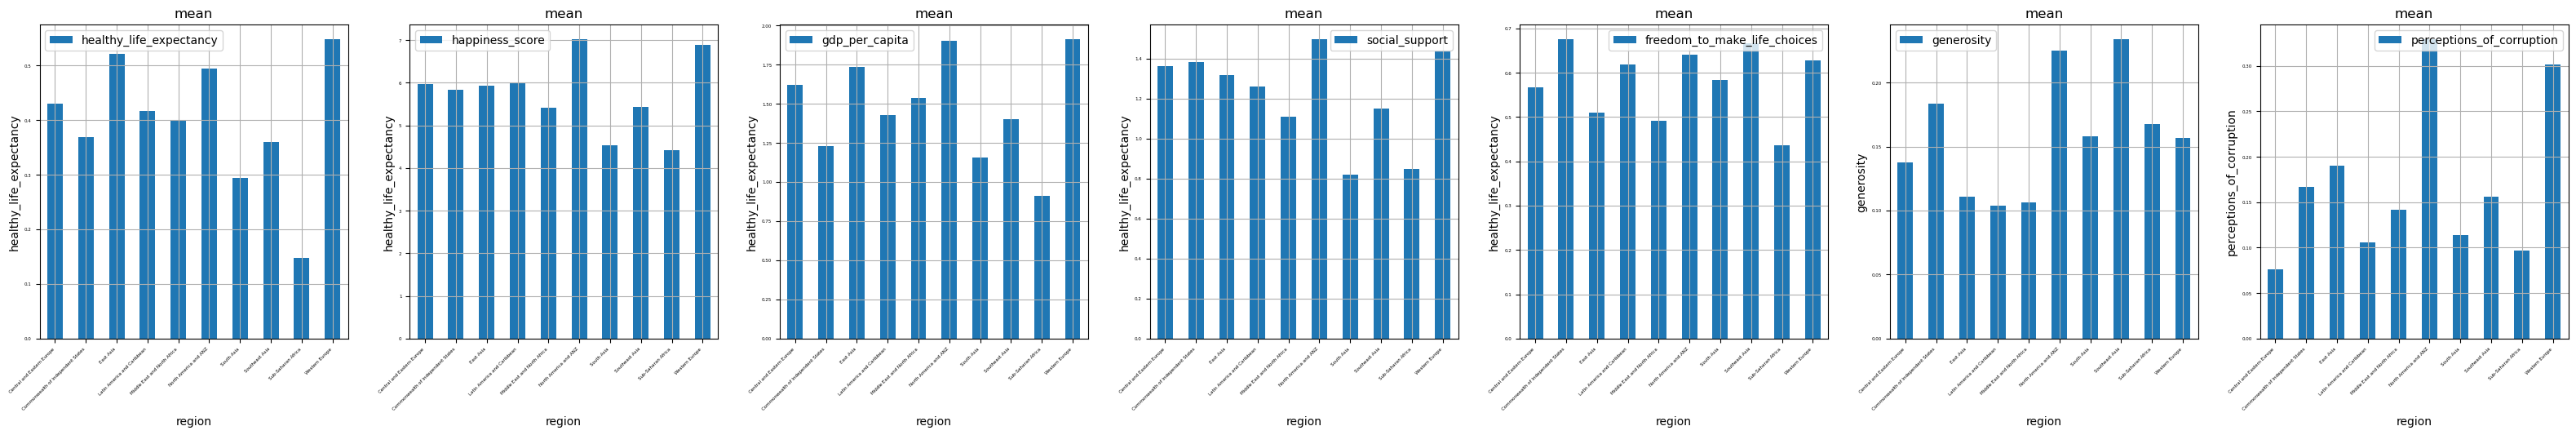

In [63]:
happiness_df_x = ['Central and Eastern Europe', 'Commonwealth of Independent States', 'East Asia', 'Latin America and Caribbean', 'Middle East and North Africa', 'North America and ANZ', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']

fig, axes = plt.subplots(1, 7, figsize=(40, 5))


hp_mean_df.plot(title='mean', x='region', y='healthy_life_expectancy', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="healthy_life_expectancy")
hp_mean_df.plot(title='mean', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="healthy_life_expectancy")
hp_mean_df.plot(title='mean', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="healthy_life_expectancy")
hp_mean_df.plot(title='mean', x='region', y='social_support', fontsize='4', kind='bar', grid=True, ax=axes[3], ylabel="healthy_life_expectancy")
hp_mean_df.plot(title='mean', x='region', y='freedom_to_make_life_choices', fontsize='4', kind='bar', grid=True, ax=axes[4], ylabel="healthy_life_expectancy")
hp_mean_df.plot(title='mean', x='region', y='generosity', fontsize='4', kind='bar', grid=True, ax=axes[5], ylabel="generosity")
hp_mean_df.plot(title='mean', x='region', y='perceptions_of_corruption', fontsize='4', kind='bar', grid=True, ax=axes[6], ylabel="perceptions_of_corruption")
for i in range(len(axes)):
    axes[i].set_xticklabels(happiness_df_x, rotation=45, ha='right')
# plt.xticks(happiness_df_x)
# plt.xlim([0, 9])
# hp_min_df.plot(title='min', x='region', y='healthy_life_expectancy', fontsize='4', kind='line', grid=True, ax=axes[1], ylabel="healthy_life_expectancy", marker = 'o')
# hp_max_df.plot(title='max', x='region', y='healthy_life_expectancy', fontsize='4', kind='line', grid=True, ax=axes[2], ylabel="healthy_life_expectancy", marker = 'o')
# hp_std_df.plot(title='std', x='region', y='healthy_life_expectancy', fontsize='4', kind='line', grid=True, ax=axes[3], ylabel="healthy_life_expectancy", marker = 'o')